<a href="https://www.kaggle.com/code/omarkhan99/customers-personality-clustering?scriptVersionId=110438482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## import

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Read Data

In [2]:
data= pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep='\t',encoding='utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## EDA

### Content
#### ID: Customer's unique identifier
#### Year_Birth: Customer's birth year
#### Education: Customer's education level
#### Marital_Status: Customer's marital status
#### Income: Customer's yearly household income
#### Kidhome: Number of children in customer's household
#### Teenhome: Number of teenagers in customer's household
#### Dt_Customer: Date of customer's enrollment with the company
#### Recency: Number of days since customer's last purchase
#### Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### MntWines: Amount spent on wine in last 2 years
#### MntFruits: Amount spent on fruits in last 2 years
#### MntMeatProducts: Amount spent on meat in last 2 years
#### MntFishProducts: Amount spent on fish in last 2 years
#### MntSweetProducts: Amount spent on sweets in last 2 years
#### MntGoldProds: Amount spent on gold in last 2 years
#### NumDealsPurchases: Number of purchases made with a discount
#### AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#### AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#### AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#### AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#### AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#### Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### NumWebPurchases: Number of purchases made through the company’s website
#### NumCatalogPurchases: Number of purchases made using a catalogue
#### NumStorePurchases: Number of purchases made directly in stores
#### NumWebVisitsMonth: Number of visits to company’s website in the last month

### Questions:
#### 1-Relationship between Date of customer's enrollment and marital status?
#### 2-The relationship between the number of purchases and marital status?
#### 3-The relationship between the number of purchases and the number of children and the family size?
#### 4-What does age have to do with the number of purchases?
#### 5-What is the relationship between education and income?
#### 6-What is the relationship between income, family size and number of children?
#### 7-What is the relationship between income and the number of purchases?
#### 8-What is the relationship between the number of purchases from the website and the number of website visits?
#### 9-What is the relationship between the number of purchases from a Deal with the number of purchases from the website, the number of purchases from the catalog, and the number of purchases from the store?
#### 10-What is the relationship between the number of purchases from a Deal with accepted cmp 1 ,accepted cmp 2,accepted cmp 3 ,accepted cmp 4 ,accepted cmp 5 and Response?
#### 11-What is the relationship between the complaint and Date of customer's enrollment?

In [5]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Add new features or modify features to better clarify the data

In [6]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("Date of registration of the company's newest client:",max(dates))
print("Date of registration of the company's oldest client:",min(dates))

Date of registration of the company's newest client: 2014-12-06
Date of registration of the company's oldest client: 2012-01-08


In [7]:
#Created a feature "Customer_From_days"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_From_days"] = days
data["Customer_From_days"] = pd.to_numeric(data["Customer_From_days"], errors="coerce")
for i in range(len(data['Customer_From_days'])):
    t=0
    t=data['Customer_From_days'][i]
    data['Customer_From_days'][i]=t/60/60/24/1000000000

In [8]:
# Create a feature that shows the age of the customer based on the date of birth feature
data["Age"] = 2021-data["Year_Birth"]

In [9]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_From_days,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,971,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,125,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,472,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,65,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,321,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,541,54
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,61,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,315,40
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,316,65


In [10]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
# We will change the values[Alone,Absurd,YOLO] because there are few of them and they all refer to the same single meaning
data['Marital_Status'].replace('Alone','Single',inplace=True)
data['Marital_Status'].replace('Absurd','Single',inplace=True)
data['Marital_Status'].replace('YOLO','Single',inplace=True)

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Widow":"Alone", "Divorced":"Alone" ,'Single':"Alone"})

#Feature indicating total children living in the household
data["Num_Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Num_Children"]

### Q1: Relationship between Date of customer's enrollment and marital status ?

In [12]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

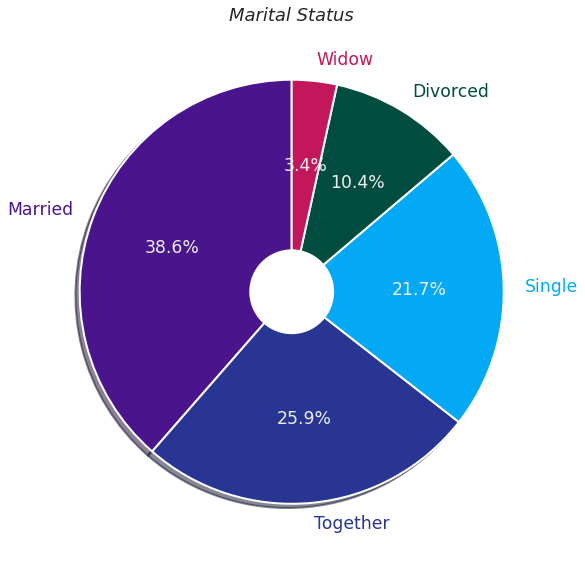

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
colors2=['#4a148c','#283593','#03a9f4','#004d40','#c2185b']
patches, texts, pcts = ax.pie(
    data['Marital_Status'].value_counts(), labels=[*data['Marital_Status'].value_counts().index],shadow=True, autopct='%.1f%%',colors=colors2
    ,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#EEEEEE')
plt.setp(texts, fontweight=200)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='Marital Status',fontsize=18,fontstyle='italic')

plt.tight_layout()

#### The largest proportion of the company's customers are people who live with partners

<AxesSubplot:xlabel='Marital_Status', ylabel='Customer_From_days'>

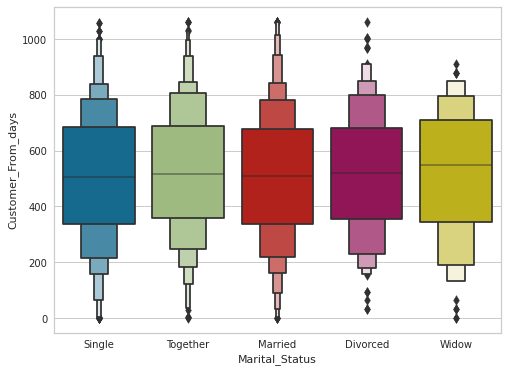

In [14]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=data,x='Marital_Status',y='Customer_From_days')


#### There is no relationship between marital status and the date of joining the company

### Q2: The relationship between the number of purchases and marital status?

In [15]:
# Create a feature that shows the number of purchases for customers
data['total_purchases']=data['MntFishProducts']+data["MntFruits"]+data['MntGoldProds']+data['MntMeatProducts']+data['MntSweetProducts']+data["MntWines"]

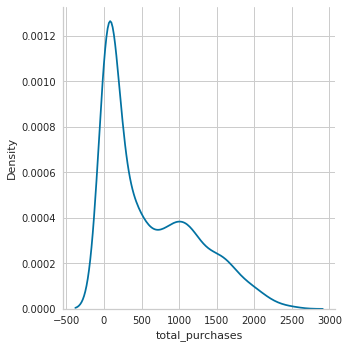

In [16]:
sns.displot(data,x='total_purchases',kind='kde')

In [17]:
print('Min:'+str(min(data['total_purchases'])),'| Max: '+str(max(data['total_purchases'])))

Min:5 | Max: 2525


In [18]:
inter=pd.interval_range(start=5,freq=210, end= 2525)
inter

IntervalIndex([(5, 215], (215, 425], (425, 635], (635, 845], (845, 1055] ... (1475, 1685], (1685, 1895], (1895, 2105], (2105, 2315], (2315, 2525]], dtype='interval[int64, right]')

In [19]:
# We will classify the number of purchases into more than one category
s=5
name_class=[]
for i in range(12):
    t='class ' + str(i) +" : ("+str(s)+ ", " +str(s+210) +')'
    name_class.append(t)
    s=s+210
inter=[5,215,425,635,845,1055,1265,1475,1685,1895,2105,2315,2525]
data['purchase_quantity']=pd.cut(data['total_purchases'],bins=inter,labels=name_class)

In [20]:
data['purchase_quantity'].value_counts()

class 0 : (5, 215)         920
class 1 : (215, 425)       246
class 4 : (845, 1055)      184
class 2 : (425, 635)       177
class 5 : (1055, 1265)     172
class 3 : (635, 845)       161
class 6 : (1265, 1475)     117
class 7 : (1475, 1685)     117
class 8 : (1685, 1895)      67
class 9 : (1895, 2105)      50
class 10 : (2105, 2315)     20
class 11 : (2315, 2525)      8
Name: purchase_quantity, dtype: int64

In [21]:
d={'num_clas':data['purchase_quantity'].value_counts(),'clas':name_class}

import plotly.express as px

fig = px.pie(d,values='num_clas', names='clas',labels='clas',color_discrete_sequence=px.colors.sequential.haline,title='Buyer Categories')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.show()

#### That the largest percentage of the number of purchases made by customers and up to 41.1% was between 5 to 215 purchases and the more purchases the less the percentage

In [22]:
pre=[]
total=d['num_clas'].sum()
for i in d['num_clas']:
    n=i/total
    pre.append(n.round(3)*100)

In [23]:
d_1={'number':d['num_clas'] ,'pre_clas':pre}
df=pd.DataFrame(data=d_1)

In [24]:
df

,number,pre_clas
"class 0 : (5, 215)",920,41.1
"class 1 : (215, 425)",246,11.0
"class 4 : (845, 1055)",184,8.2
"class 2 : (425, 635)",177,7.9
"class 5 : (1055, 1265)",172,7.7
"class 3 : (635, 845)",161,7.2
"class 6 : (1265, 1475)",117,5.2
"class 7 : (1475, 1685)",117,5.2
"class 8 : (1685, 1895)",67,3.0
"class 9 : (1895, 2105)",50,2.2


In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size,total_purchases,purchase_quantity
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,971,64,Alone,0,1,1617,"class 7 : (1475, 1685)"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,125,67,Alone,2,3,27,"class 0 : (5, 215)"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,472,56,Partner,0,2,776,"class 3 : (635, 845)"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,65,37,Partner,1,3,53,"class 0 : (5, 215)"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,321,40,Partner,1,3,422,"class 1 : (215, 425)"


In [26]:
name_class

['class 0 : (5, 215)',
 'class 1 : (215, 425)',
 'class 2 : (425, 635)',
 'class 3 : (635, 845)',
 'class 4 : (845, 1055)',
 'class 5 : (1055, 1265)',
 'class 6 : (1265, 1475)',
 'class 7 : (1475, 1685)',
 'class 8 : (1685, 1895)',
 'class 9 : (1895, 2105)',
 'class 10 : (2105, 2315)',
 'class 11 : (2315, 2525)']

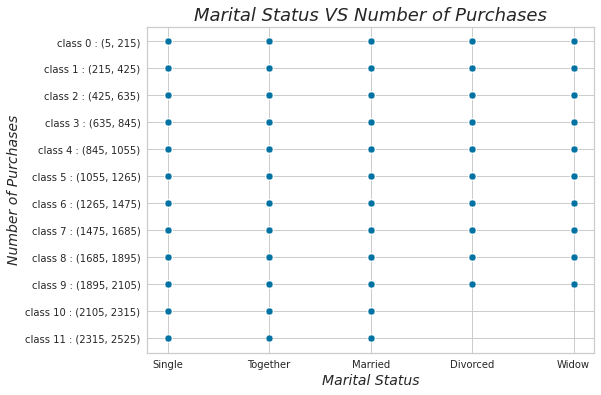

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Marital_Status',y='purchase_quantity')
plt.xlabel(fontsize=14,xlabel='Marital Status',fontstyle='italic')
plt.ylabel(fontsize=14,ylabel='Number of Purchases',fontstyle='italic')
plt.title(label='Marital Status VS Number of Purchases',fontsize=18,fontstyle='italic')
plt.show()

#### Divorced and widowed clients are not included in the categories 10 and 11

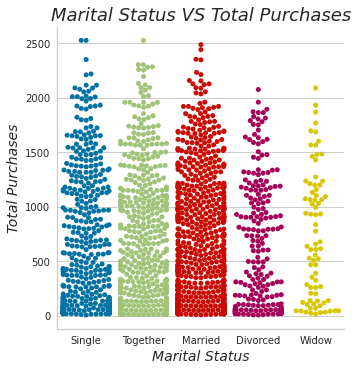

In [28]:
sns.catplot(data=data,x='Marital_Status',y='total_purchases',kind='swarm')
plt.xlabel(fontsize=14,xlabel='Marital Status',fontstyle='italic')
plt.ylabel(fontsize=14,ylabel='Total Purchases',fontstyle='italic')
plt.title(label='Marital Status VS Total Purchases',fontsize=18,fontstyle='italic')
plt.show()

### Q3: The relationship between the number of purchases and the number of children and the age them?

In [29]:
data['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [30]:
data['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

<AxesSubplot:xlabel='Kidhome', ylabel='total_purchases'>

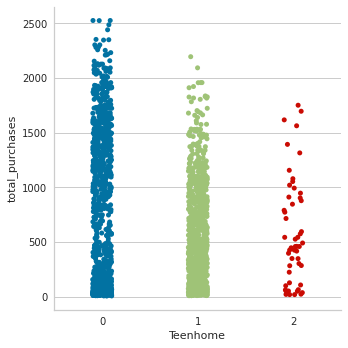

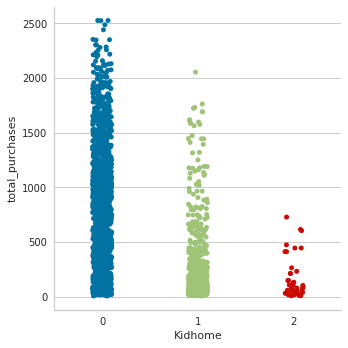

In [31]:
sns.catplot(data=data,x='Teenhome',y='total_purchases',kind='strip')
sns.catplot(data=data,x='Kidhome',y='total_purchases',kind='strip')
plt.subplot()

#### We see that customers with teenagers have more purchases than customers with children

In [32]:
data['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

In [33]:
color_3=['#06113C','#DF7861','#5F6F94','#CA4E79','#7A4069']

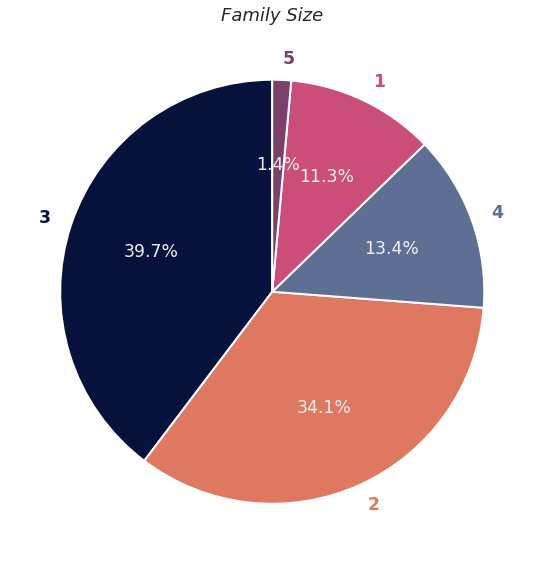

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
patches, texts, pcts = ax.pie(
    data['Family_Size'].value_counts(), labels=[*data['Family_Size'].value_counts().index], autopct='%.1f%%',colors=color_3
    ,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#EEEEEE')
plt.setp(texts, fontweight=600)
plt.tight_layout()
plt.title(label='Family Size',fontsize=18,fontstyle='italic')

plt.tight_layout()

#### Most of the company's clients are families of two or 3

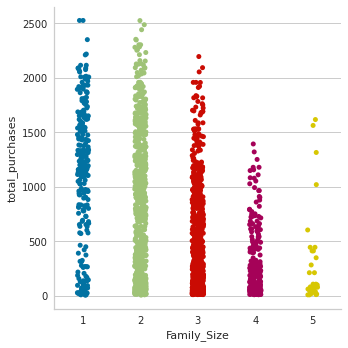

In [35]:
sns.catplot(data=data,x='Family_Size',y='total_purchases',kind='strip')

#### The figure shows that the higher the number of family members, the fewer purchases

### Q4: What does age have to do with the number of purchases?

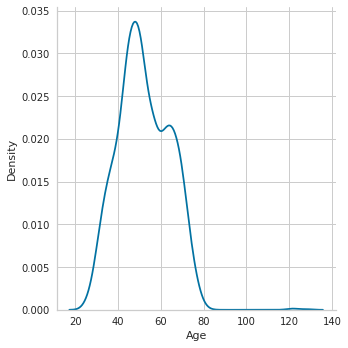

In [36]:
sns.displot(data,x='Age',kind='kde')

In [37]:
print("Oldest customer:",max(data['Age']))
print("Youngest customer:",min(data['Age']))

Oldest customer: 128
Youngest customer: 25


In [38]:
data['Age'].mean()

52.19419642857143

#### Average customer age 52

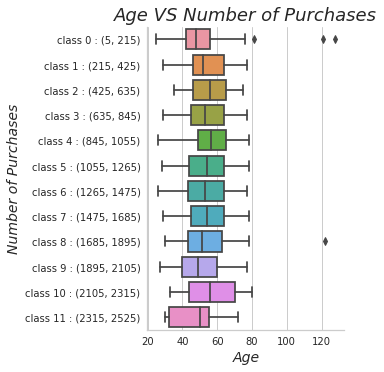

In [39]:
sns.catplot(data=data,x='Age',y='purchase_quantity',kind='box')
plt.xlabel(fontsize=14,xlabel='Age',fontstyle='italic')
plt.ylabel(fontsize=14,ylabel='Number of Purchases',fontstyle='italic')
plt.title(label='Age VS Number of Purchases',fontsize=18,fontstyle='italic')
plt.show()

#### There is no relationship between age and number of purchases

### Q5: What is the relationship between education and income?

In [40]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [41]:
color_1=['#006064', '#3d5afe', '#880e4f','#dd2c00','#6a1b9a']

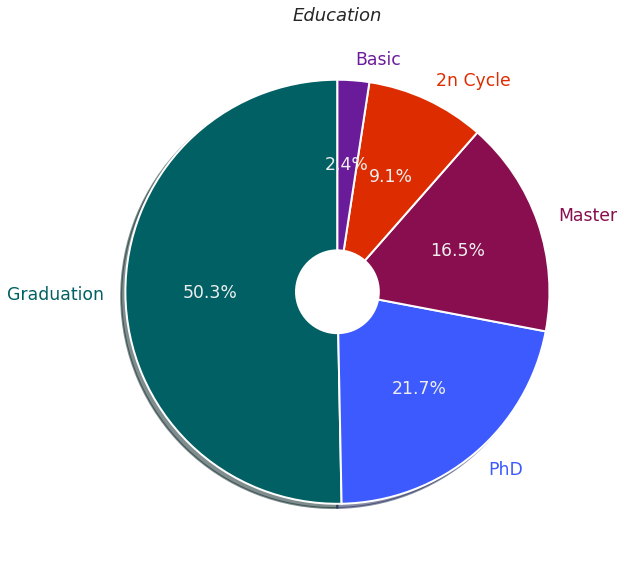

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
patches, texts, pcts = ax.pie(
    data['Education'].value_counts(), labels=[*data['Education'].value_counts().index],shadow=True, autopct='%.1f%%',colors=color_1
    ,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#EEEEEE')
plt.setp(texts, fontweight=200)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='Education',fontsize=18,fontstyle='italic')

plt.tight_layout()

#### The percentage of clients with university degrees reaches 97.6%

<AxesSubplot:xlabel='Income'>

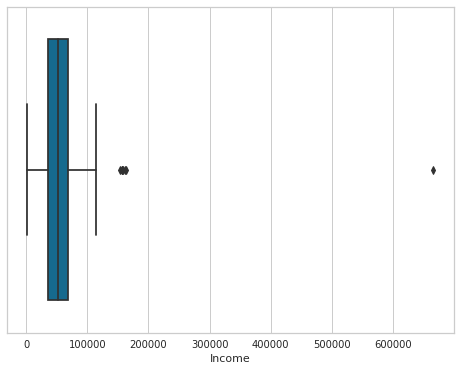

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Income')

In [44]:
data=data[data['Income']<200000]

In [45]:
fig = px.box(data, x="Education", y="Income",)
fig.show()

#### The average income of all clients is very similar except for Basic

### Q6: What is the relationship between income, family size and number of children?

In [46]:
fig = px.scatter(data, x="Num_Children", y="Income")
fig.show()

#### All clients have approximately the same income, despite the difference in the number of children, except for those who have 3

Text(0.5, 1.0, 'Income/Family Size')

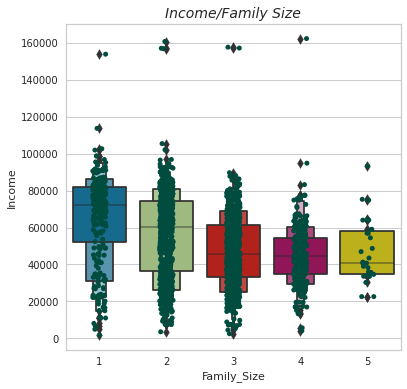

In [47]:
plt.figure(figsize=(6,6))
sns.boxenplot(data=data, x="Family_Size", y="Income")
sns.stripplot(data=data, x="Family_Size", y="Income",color='#004d40')
plt.title(label='Income/Family Size',fontsize=14,fontstyle='italic')

#### All clients receive roughly the same income, despite the difference in family size, except for those whose share size is 5

### Q7: What is the relationship between income and the number of purchases?

In [48]:
fig = px.scatter(data, x="total_purchases", y="Income")
fig.show()

#### There is a near-linear relationship between income and the number of purchases

### Q8: What is the relationship between the number of purchases from the website and the number of website visits?

In [49]:
data['NumWebPurchases'].value_counts()

2     368
1     348
3     333
4     277
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
27      1
25      1
Name: NumWebPurchases, dtype: int64

In [50]:
data['NumWebVisitsMonth'].value_counts()

7     387
8     340
6     334
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64

Text(0.5, 1.0, 'NumWebVisitsMonth / NumWebPurchases')

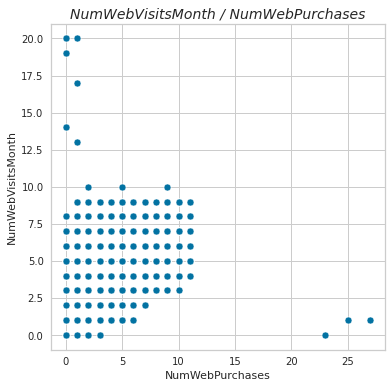

In [51]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x="NumWebPurchases", y="NumWebVisitsMonth")
plt.title(label='NumWebVisitsMonth / NumWebPurchases',fontsize=14,fontstyle='italic')

<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

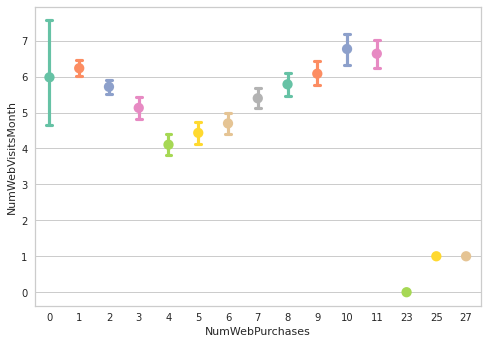

In [52]:
sns.pointplot(data=data,x='NumWebPurchases',y='NumWebVisitsMonth',palette='Set2',capsize=.2)

#### In general, there is a linear relationship between the number of visits to the site and the number of purchases from it

### Q9: What is the relationship between the number of purchases from a Deal with the number of purchases from the website, the number of purchases from the catalog, and the number of purchases from the store?

In [53]:
data['NumDealsPurchases'].value_counts()

1     960
2     493
3     293
4     187
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
13      3
12      3
Name: NumDealsPurchases, dtype: int64

In [54]:
data['NumWebPurchases'].value_counts()

2     368
1     348
3     333
4     277
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
27      1
25      1
Name: NumWebPurchases, dtype: int64

<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumDealsPurchases'>

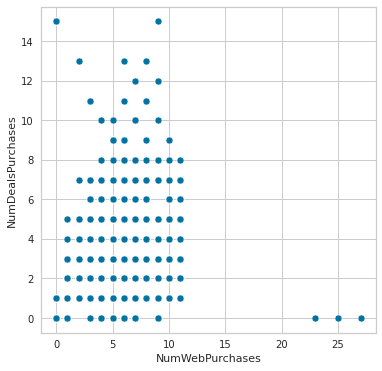

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data,x='NumWebPurchases',y='NumDealsPurchases')

In [56]:
data['NumCatalogPurchases'].value_counts()

0     576
1     491
2     274
3     182
4     181
5     137
6     128
7      79
8      55
10     47
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='NumDealsPurchases'>

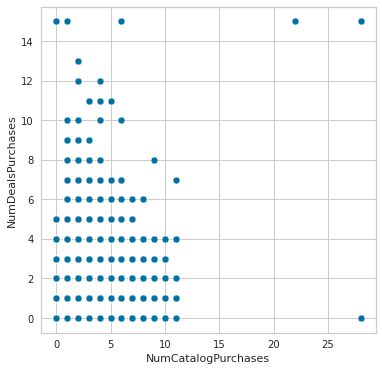

In [57]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data,x='NumCatalogPurchases',y='NumDealsPurchases')

In [58]:
data['NumStorePurchases'].value_counts()

3     483
4     319
2     220
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: NumStorePurchases, dtype: int64

<AxesSubplot:xlabel='NumStorePurchases', ylabel='NumDealsPurchases'>

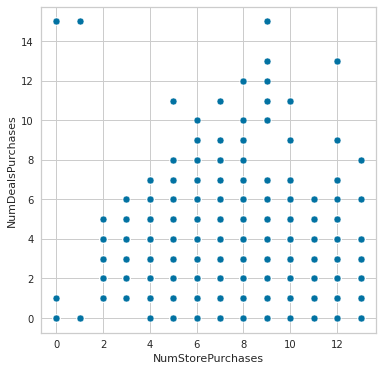

In [59]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data,x='NumStorePurchases',y='NumDealsPurchases')

### Q10: What is the relationship between the number of purchases from a Deal with accepted cmp 1 ,accepted cmp 2,accepted cmp 3 ,accepted cmp 4 ,accepted cmp 5 and Response?

In [60]:
data['NumDealsPurchases'].value_counts()

1     960
2     493
3     293
4     187
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
13      3
12      3
Name: NumDealsPurchases, dtype: int64

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

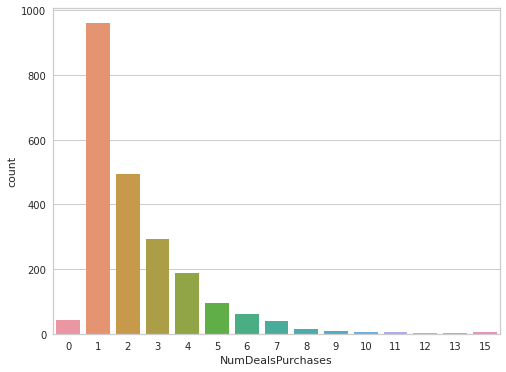

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='NumDealsPurchases')

#### Almost all customers have made a purchase at least once

In [62]:
# Create a feature that collects all offers
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

<AxesSubplot:xlabel='Total_Promos', ylabel='count'>

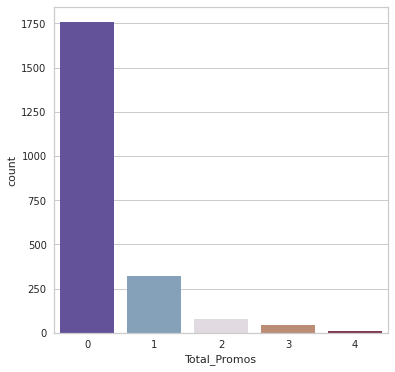

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='Total_Promos',palette='twilight_shifted')

#### The number of customers who did not accept the offers is very large, up to 80%

### Q11: What is the relationship between the complaint and Date of customer's enrollment?

In [64]:
data['Complain'].value_counts()

0    2194
1      21
Name: Complain, dtype: int64

<AxesSubplot:xlabel='Complain', ylabel='count'>

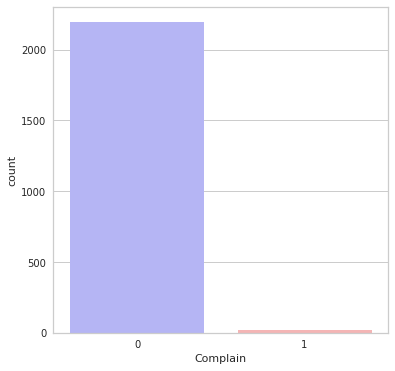

In [65]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='Complain',palette='bwr')

#### Very few customers who complained

<AxesSubplot:xlabel='Complain', ylabel='Customer_From_days'>

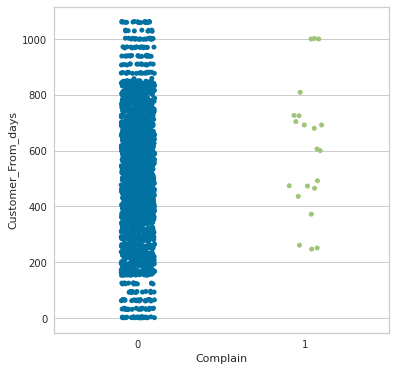

In [66]:
plt.figure(figsize=(6,6))
sns.stripplot(data=data,x='Complain',y='Customer_From_days')

#### All customers who filed a complaint as if they were with the company more than 200 days ago

## Data Preprocessing

In [67]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_From_days     0
Age                    0
Living_With            0
Num_Children           0
Family_Size            0
total_purchases        0
purchase_quantity      1
Total_Promos           0
dtype: int64

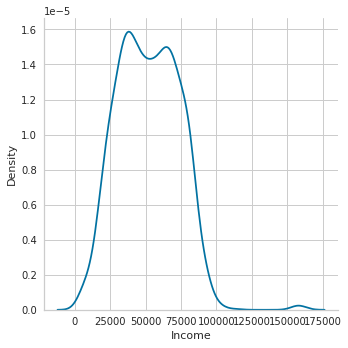

In [68]:
sns.displot(data,x='Income',kind="kde")

In [69]:
fill_tobed=data['Income'].dropna()
data['Income']=data['Income'].fillna(pd.Series(np.random.choice(fill_tobed,size=len(data.index))))

In [70]:
fill_tobed=data['purchase_quantity'].dropna()
data['purchase_quantity']=data['purchase_quantity'].fillna(pd.Series(np.random.choice(fill_tobed,size=len(data.index))))

In [71]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_From_days     0
Age                    0
Living_With            0
Num_Children           0
Family_Size            0
total_purchases        0
purchase_quantity      0
Total_Promos           0
dtype: int64

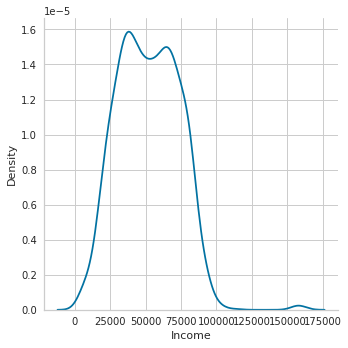

In [72]:
sns.displot(data,x='Income',kind="kde")

<AxesSubplot:xlabel='Income'>

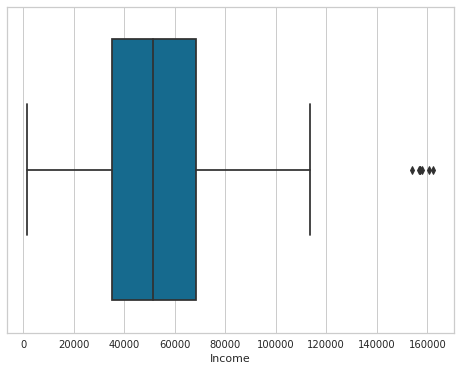

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Income')

In [74]:
# Remove outliers
data=data[data['Income']<150000]

<AxesSubplot:xlabel='Age'>

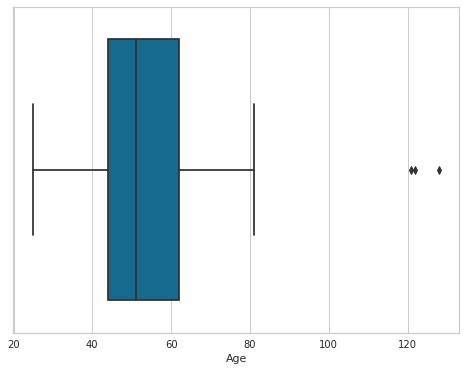

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Age')

In [76]:
# Remove outliers
data=data[data['Age']<100]

<AxesSubplot:xlabel='Recency'>

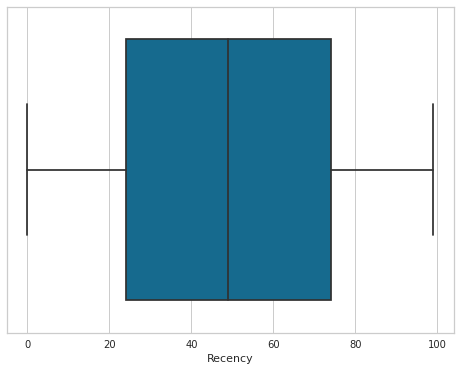

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Recency')

In [78]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_From_days', 'Age', 'Living_With', 'Num_Children',
       'Family_Size', 'total_purchases', 'purchase_quantity', 'Total_Promos'],
      dtype='object')

In [79]:
# Drop columns we don't need them
data=data[['Education', 'Marital_Status', 'Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Kidhome',
       'Teenhome','Num_Children','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_From_days', 'Age', 'Family_Size', 'total_purchases','purchase_quantity','Total_Promos']]

In [80]:
data

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_From_days,Age,Family_Size,total_purchases,purchase_quantity,Total_Promos
0,Graduation,Single,58138.0,58,635,88,546,172,88,0,...,8,10,4,7,971,64,1,1617,"class 7 : (1475, 1685)",0
1,Graduation,Single,46344.0,38,11,1,6,2,1,1,...,1,1,2,5,125,67,3,27,"class 0 : (5, 215)",0
2,Graduation,Together,71613.0,26,426,49,127,111,21,0,...,8,2,10,4,472,56,2,776,"class 3 : (635, 845)",0
3,Graduation,Together,26646.0,26,11,4,20,10,3,1,...,2,0,4,6,65,37,3,53,"class 0 : (5, 215)",0
4,PhD,Married,58293.0,94,173,43,118,46,27,1,...,5,3,6,5,321,40,3,422,"class 1 : (215, 425)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,709,43,182,42,118,0,...,9,3,4,5,541,54,3,1341,"class 6 : (1265, 1475)",0
2236,PhD,Together,64014.0,56,406,0,30,0,0,2,...,8,2,5,7,61,75,5,444,"class 2 : (425, 635)",1
2237,Graduation,Divorced,56981.0,91,908,48,217,32,12,0,...,2,3,13,6,315,40,1,1241,"class 5 : (1055, 1265)",1
2238,Master,Together,69245.0,8,428,30,214,80,30,0,...,6,5,10,3,316,65,3,843,"class 3 : (635, 845)",0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   object  
 1   Marital_Status       2205 non-null   object  
 2   Income               2205 non-null   float64 
 3   Recency              2205 non-null   int64   
 4   MntWines             2205 non-null   int64   
 5   MntFruits            2205 non-null   int64   
 6   MntMeatProducts      2205 non-null   int64   
 7   MntFishProducts      2205 non-null   int64   
 8   MntSweetProducts     2205 non-null   int64   
 9   Kidhome              2205 non-null   int64   
 10  Teenhome             2205 non-null   int64   
 11  Num_Children         2205 non-null   int64   
 12  MntGoldProds         2205 non-null   int64   
 13  NumDealsPurchases    2205 non-null   int64   
 14  NumWebPurchases      2205 non-null   int64   
 15  NumCatalogPurchases  

In [82]:
s = (data.dtypes == 'object')
n = (data.dtypes == 'category')
object_cols = list(s[s].index)
category_col = list(n[n].index)
print("Categorical variables in the dataset:", object_cols, category_col)

Categorical variables in the dataset: ['Education', 'Marital_Status'] ['purchase_quantity']


In [83]:
LE=LabelEncoder()
for i in object_cols:
    object_le=LE
    data[i]=object_le.fit_transform(data[i])
    print(object_le.classes_)
for i in category_col:
    category_le=LE
    data[i]=category_le.fit_transform(data[i])
print("All features are now numerical")

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
['Divorced' 'Married' 'Single' 'Together' 'Widow']
All features are now numerical


<AxesSubplot:>

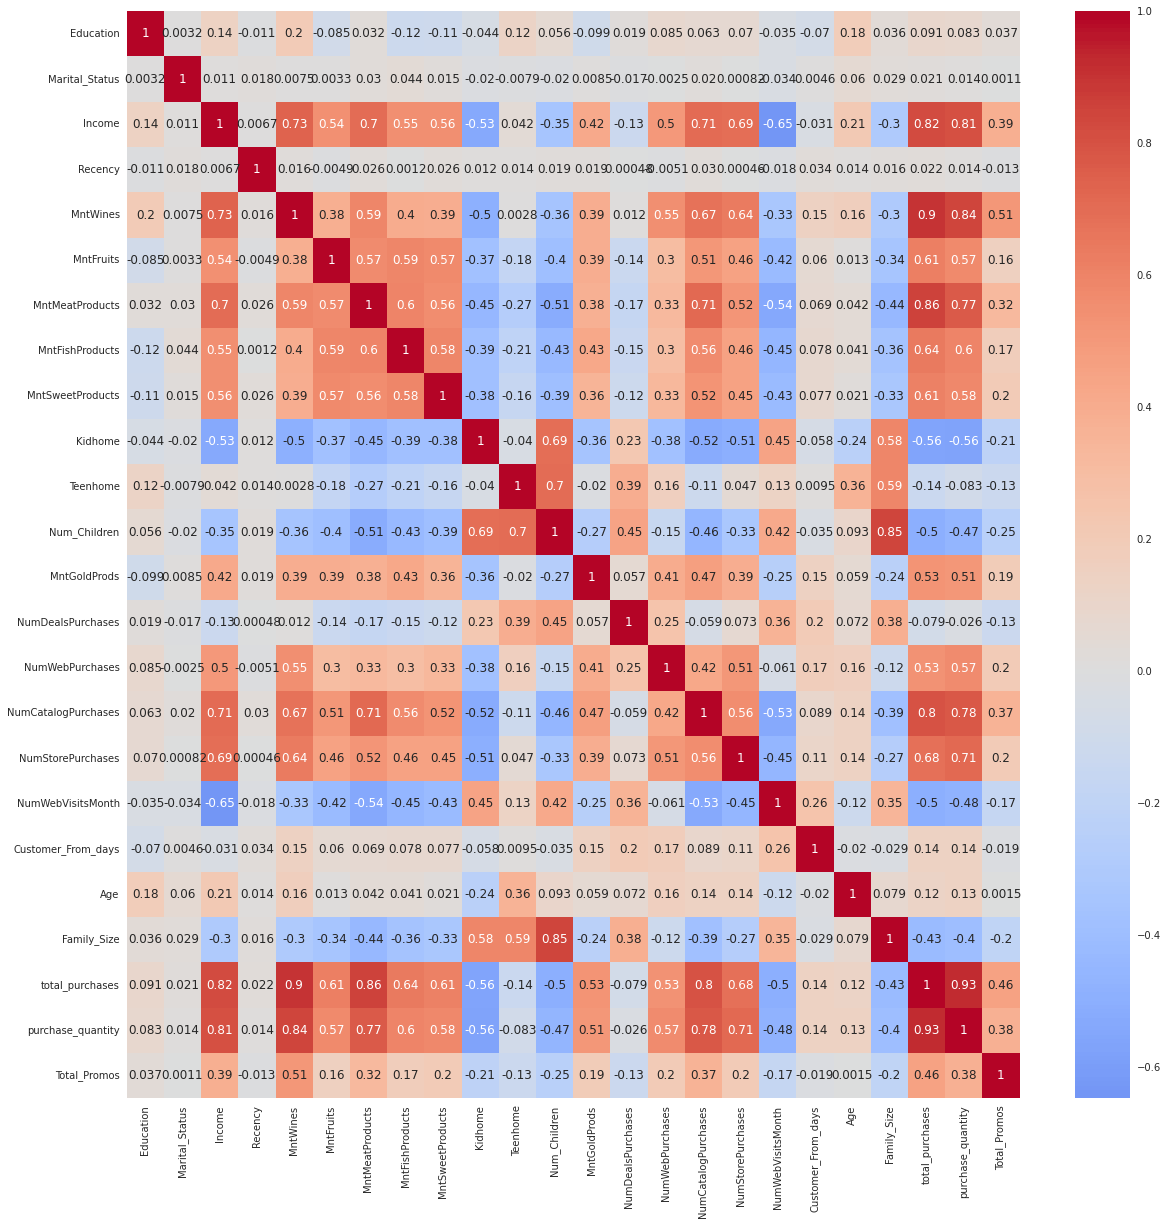

In [84]:
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='coolwarm', center=0)

In [85]:
#Creating a copy of data
ds = data.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")


All features are now scaled


In [86]:
ds.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
Kidhome                0
Teenhome               0
Num_Children           0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer_From_days     0
Age                    0
Family_Size            0
total_purchases        0
purchase_quantity      0
Total_Promos           0
dtype: int64

In [87]:
ds

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_From_days,Age,Family_Size,total_purchases,purchase_quantity,Total_Promos
0,2,2,58138.0,58,635,88,546,172,88,0,...,8,10,4,7,971,64,1,1617,9,0
1,2,2,46344.0,38,11,1,6,2,1,1,...,1,1,2,5,125,67,3,27,0,0
2,2,3,71613.0,26,426,49,127,111,21,0,...,8,2,10,4,472,56,2,776,5,0
3,2,3,26646.0,26,11,4,20,10,3,1,...,2,0,4,6,65,37,3,53,0,0
4,4,1,58293.0,94,173,43,118,46,27,1,...,5,3,6,5,321,40,3,422,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42,118,0,...,9,3,4,5,541,54,3,1341,8,0
2236,4,3,64014.0,56,406,0,30,0,0,2,...,8,2,5,7,61,75,5,444,4,1
2237,2,0,56981.0,91,908,48,217,32,12,0,...,2,3,13,6,315,40,1,1241,7,1
2238,3,3,69245.0,8,428,30,214,80,30,0,...,6,5,10,3,316,65,3,843,5,0


In [88]:
# Using PCA to reduce the dimensions of the data to 3 dimensions
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-1.288966e-17,2.992294,-5.853830,-2.719203,-0.885906,2.618322,7.430332
col2,2205.0,-2.577933e-17,1.648515,-3.723516,-1.362039,-0.170453,1.167380,6.612307
col3,2205.0,1.611208e-17,1.247571,-3.408792,-0.860292,0.016014,0.800394,5.527546


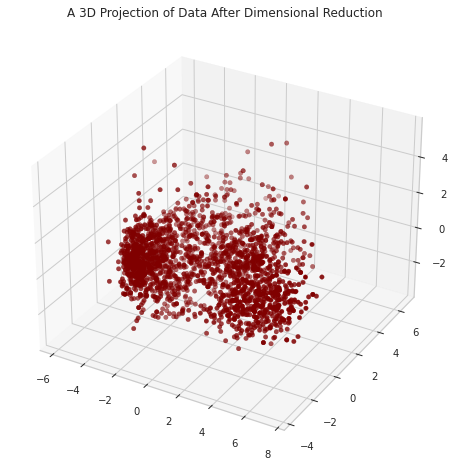

In [89]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection of Data After Dimensional Reduction")
plt.show()


## CLUSTERING

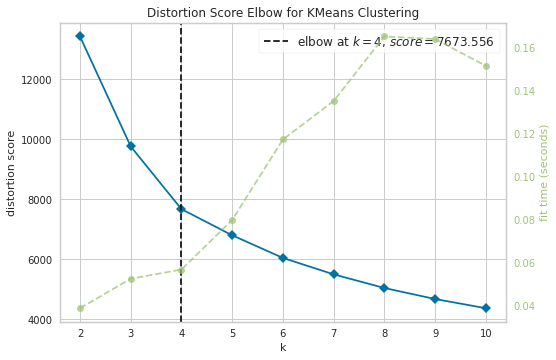

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
# Using the elbow method to find the optimal number of clusters'
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [91]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

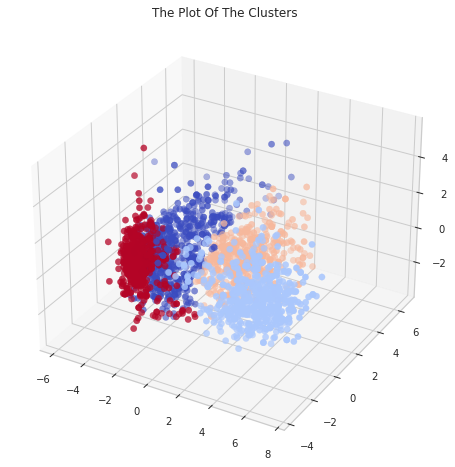

In [92]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'coolwarm' )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluation Models.

In [93]:
color_2=['#006064', '#3d5afe', '#880e4f','#dd2c00']

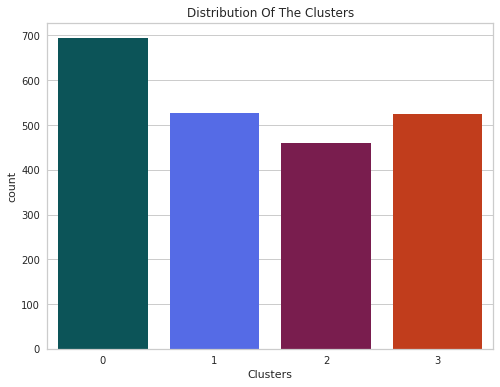

In [94]:
#Plotting countplot of clusters
plt.figure(figsize=(8,6))
pl = sns.countplot(x=data["Clusters"], palette=color_2 )
pl.set_title("Distribution Of The Clusters")
plt.show()

<AxesSubplot:>

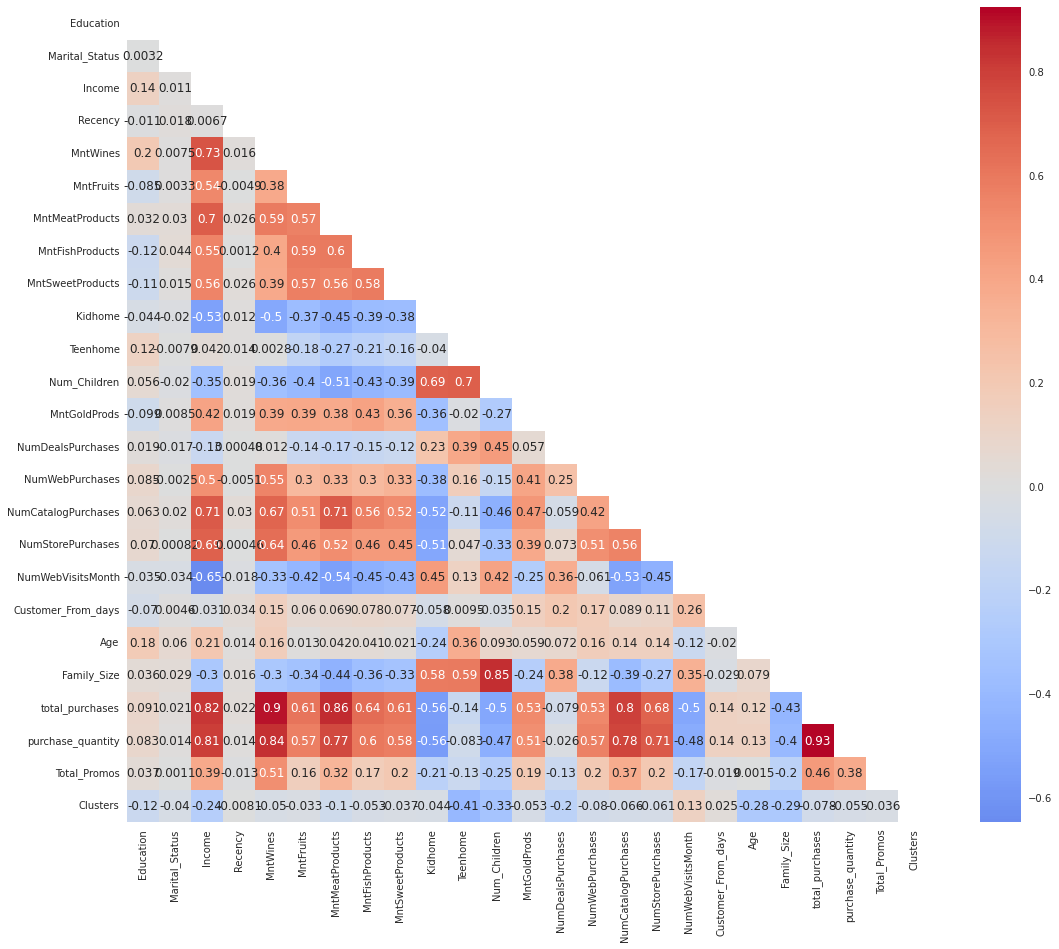

In [95]:
corrmat= data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.figure(figsize=(18,15))  
sns.heatmap(corrmat,annot=True, cmap='coolwarm', center=0,mask=mask)

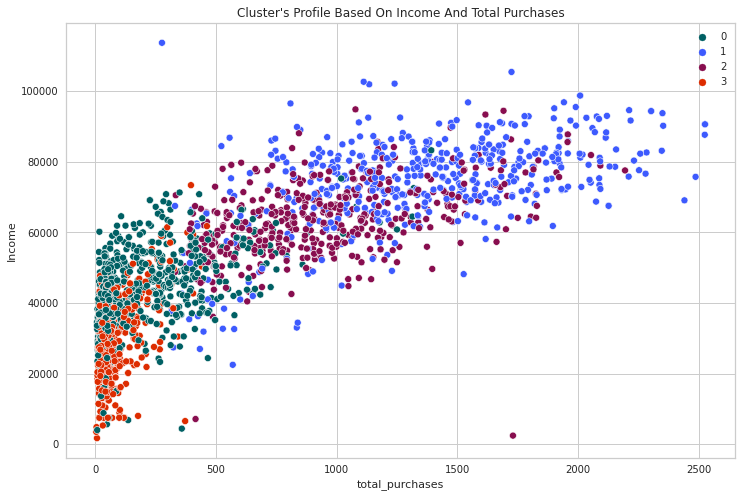

In [96]:
plt.figure(figsize=(12,8))
pl = sns.scatterplot(data = data,x=data["total_purchases"], y=data["Income"],hue=data["Clusters"], palette= color_2)
pl.set_title("Cluster's Profile Based On Income And Total Purchases")
plt.legend()
plt.show()

#### The relationship between income and the number of purchases by clusters

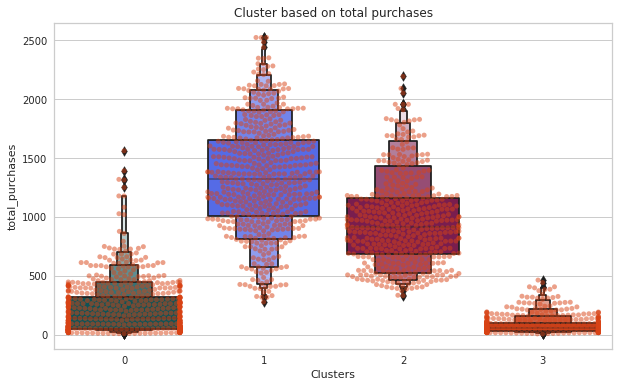

In [97]:
plt.figure(figsize=(10,6))
pl=sns.swarmplot(x=data["Clusters"], y=data["total_purchases"], color= '#d84315', alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["total_purchases"], palette=color_2)
pl.set_title("Cluster based on total purchases")
plt.show()

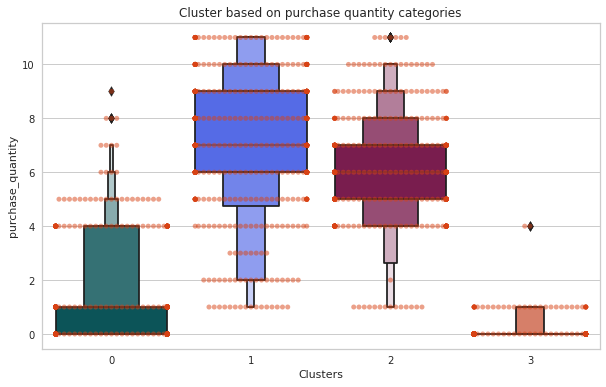

In [98]:
plt.figure(figsize=(10,6))
pl=sns.swarmplot(x=data["Clusters"], y=data["purchase_quantity"], color= '#d84315', alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["purchase_quantity"], palette=color_2)
pl.set_title("Cluster based on purchase quantity categories")
plt.show()

In [99]:
data['Total_Promos'].value_counts()

0    1747
1     322
2      81
3      44
4      11
Name: Total_Promos, dtype: int64

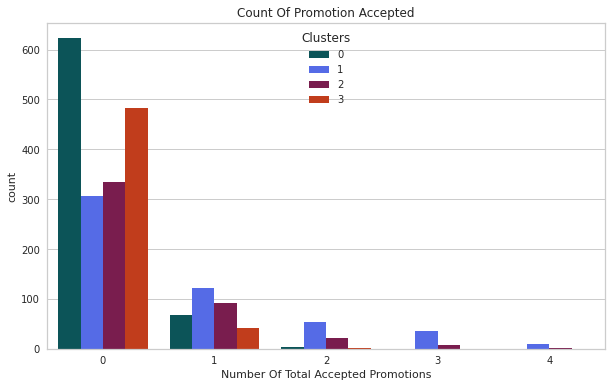

In [100]:
plt.figure(figsize=(10,6))
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= color_2)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

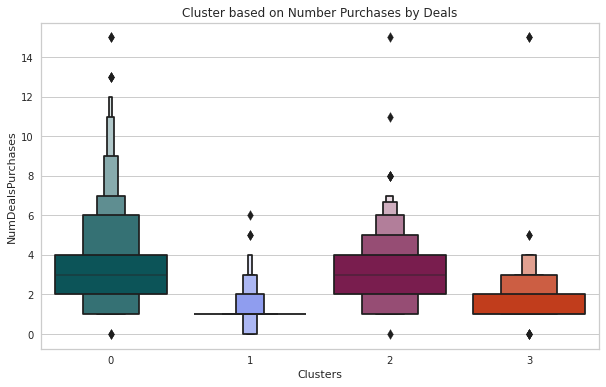

In [101]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= color_2)
pl.set_title("Cluster based on Number Purchases by Deals")
plt.show()

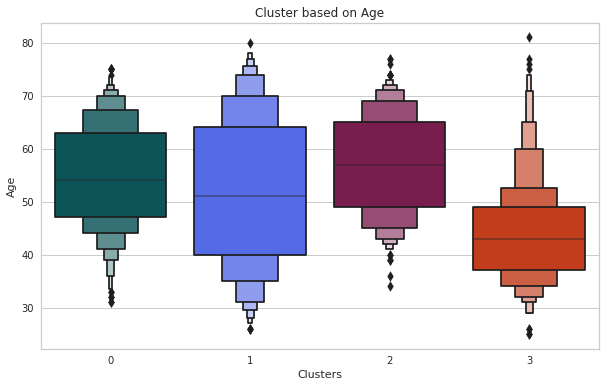

In [102]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["Age"],x=data["Clusters"], palette= color_2)
pl.set_title("Cluster based on Age")
plt.show()

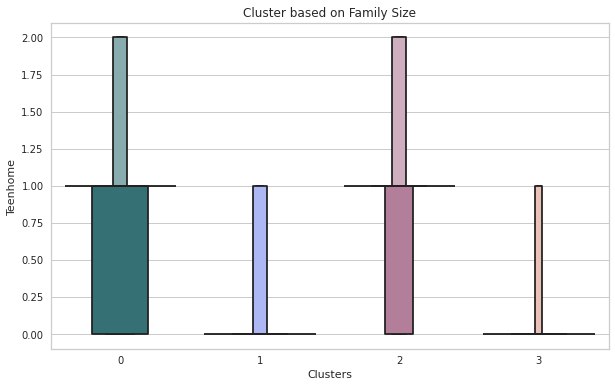

In [103]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["Teenhome"],x=data["Clusters"], palette= color_2)
pl.set_title("Cluster based on Family Size")
plt.show()

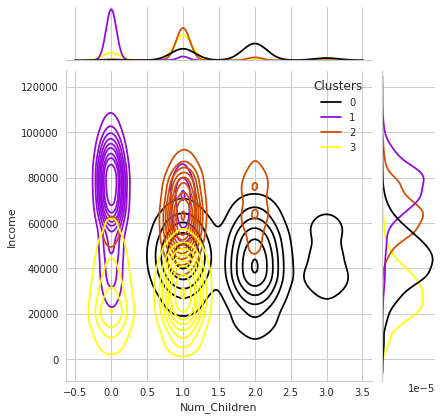

<Figure size 576x396 with 0 Axes>

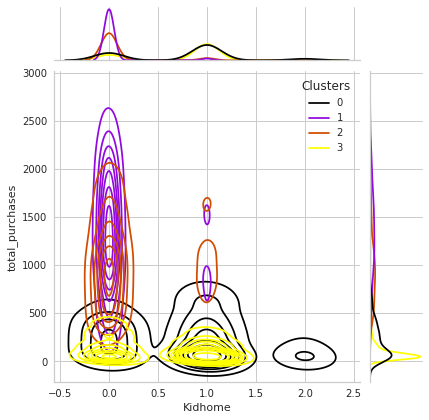

<Figure size 576x396 with 0 Axes>

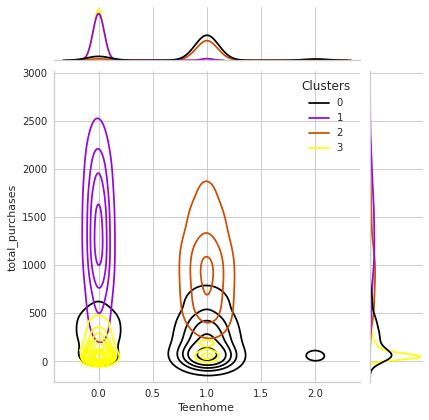

<Figure size 576x396 with 0 Axes>

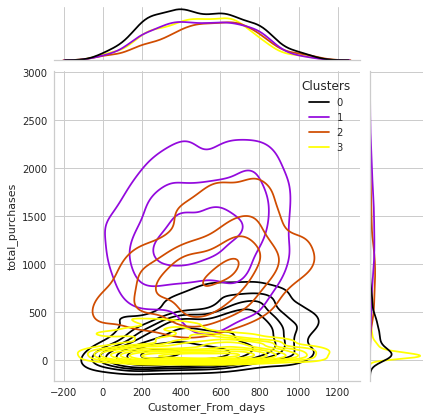

<Figure size 576x396 with 0 Axes>

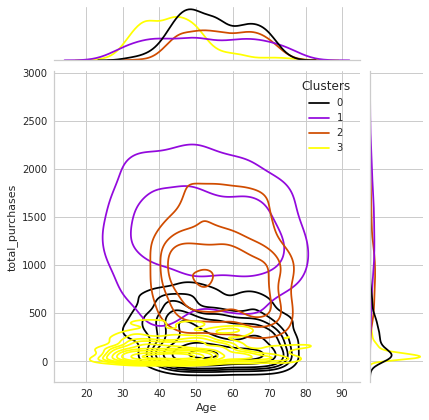

<Figure size 576x396 with 0 Axes>

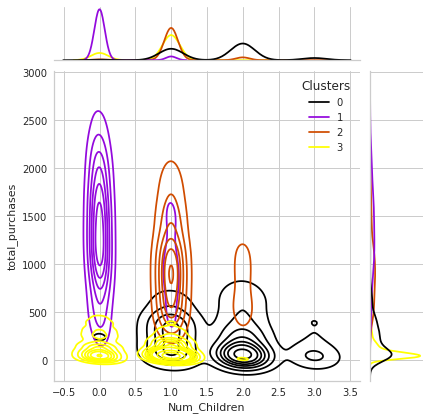

<Figure size 576x396 with 0 Axes>

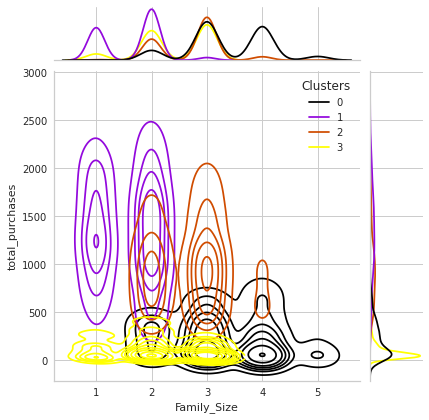

<Figure size 576x396 with 0 Axes>

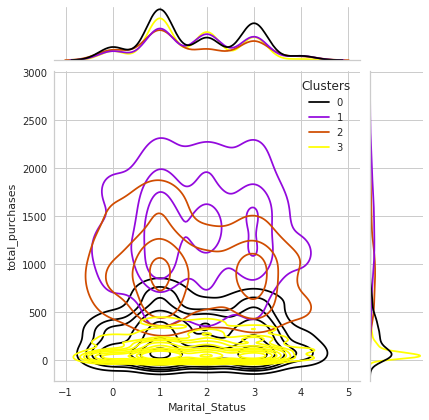

<Figure size 576x396 with 0 Axes>

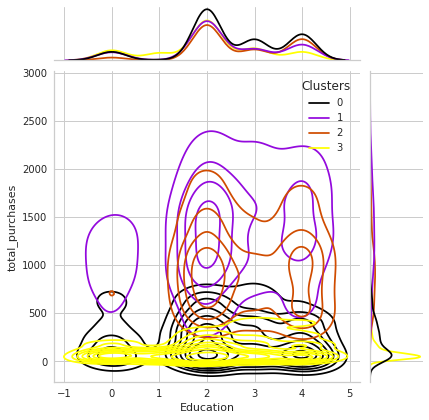

In [104]:
Personal = [ "Kidhome","Teenhome","Customer_From_days", "Age", "Num_Children", "Family_Size",'Marital_Status' ,"Education"]
sns.jointplot(x=data['Num_Children'], y=data["Income"], hue =data["Clusters"], kind="kde", palette='gnuplot')
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["total_purchases"], hue =data["Clusters"], kind="kde", palette='gnuplot')
    plt.show()

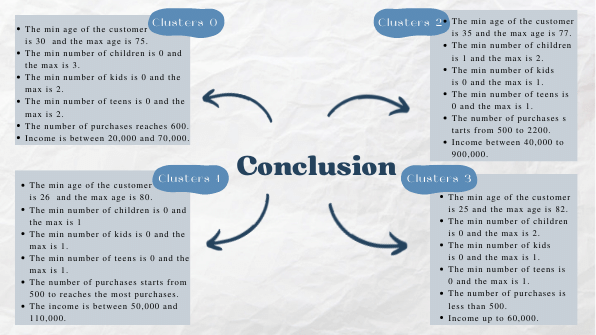

https://www.canva.com/design/DAFRH7dSxMc/Z5q7lD3JD7F1qKQFLCDPgQ/view?utm_content=DAFRH7dSxMc&utm_campaign=designshare&utm_medium=link&utm_source=homepage_design_menu